In [1]:
import os
from options.custom_test_option import BaseOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import argparse
import easydict

In [2]:
opt = BaseOptions()  # get test options

In [3]:
opt = opt.parse()

----------------- Options ---------------
                 dataroot: /opt/ml/input/data/forgan/testA
                     name: graycleaning                  
                  gpu_ids: 0                             
          checkpoints_dir: ./checkpoints                 
                    model: test                          
                 input_nc: 1                             
                output_nc: 1                             
                      ngf: 64                            
                      ndf: 64                            
                     netD: basic                         
                     netG: resnet_9blocks                
               n_layers_D: 3                             
                     norm: instance                      
                init_type: normal                        
                init_gain: 0.02                          
               no_dropout: True                          
             dataset_mode: si

In [4]:
dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options

dataset [SingleDataset] was created


In [5]:
model = create_model(opt)

initialize network with normal
model [TestModel] was created


In [6]:
model.setup(opt)  

loading the model from ./checkpoints/graycleaning/latest_net_G.pth
---------- Networks initialized -------------
DataParallel(
  (module): ResnetGenerator(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace=True)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace=True)
      (10): ResnetBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
          

In [7]:
if opt.eval:
    model.eval()

In [8]:
import torch
from PIL import Image

In [9]:
from data.base_dataset import get_transform

In [10]:
transform = get_transform(opt, grayscale=True)

In [26]:
#device = torch.device('cuda:0')

In [84]:
img = Image.open('/opt/ml/input/data/eval_dataset/images/train_00015.jpg').convert('L')

In [85]:
A = transform(img)
A = torch.unsqueeze(A, 0)

In [86]:
with torch.no_grad():
    result = model.forward(A)

In [87]:
result = result.squeeze().cpu().numpy()

In [88]:
result

array([[0.9995713 , 0.99976015, 0.999211  , ..., 0.9999501 , 0.9999412 ,
        0.9999662 ],
       [0.99972653, 0.99968696, 0.99924326, ..., 0.99994415, 0.99993306,
        0.99996185],
       [0.99971527, 0.9996005 , 0.99915904, ..., 0.9999199 , 0.999899  ,
        0.99996215],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 0.99999994,
        0.9999999 ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.99999994,
        0.99999976],
       [1.        , 1.        , 1.        , ..., 0.99999994, 0.9999998 ,
        0.9999995 ]], dtype=float32)

In [89]:
import numpy as np
#image_numpy = (np.transpose(result, (1, 2, 0)) + 1) / 2.0 * 255.0 
image_numpy = np.tile(result, (3, 1, 1))

In [90]:
image_numpy.shape

(3, 696, 164)

In [91]:
image_numpy

array([[[0.9995713 , 0.99976015, 0.999211  , ..., 0.9999501 ,
         0.9999412 , 0.9999662 ],
        [0.99972653, 0.99968696, 0.99924326, ..., 0.99994415,
         0.99993306, 0.99996185],
        [0.99971527, 0.9996005 , 0.99915904, ..., 0.9999199 ,
         0.999899  , 0.99996215],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         0.99999994, 0.9999999 ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         0.99999994, 0.99999976],
        [1.        , 1.        , 1.        , ..., 0.99999994,
         0.9999998 , 0.9999995 ]],

       [[0.9995713 , 0.99976015, 0.999211  , ..., 0.9999501 ,
         0.9999412 , 0.9999662 ],
        [0.99972653, 0.99968696, 0.99924326, ..., 0.99994415,
         0.99993306, 0.99996185],
        [0.99971527, 0.9996005 , 0.99915904, ..., 0.9999199 ,
         0.999899  , 0.99996215],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         0.99999994, 0.9999999 ],
        [1. 

In [92]:
image_numpy = image_numpy.astype(np.uint8)

In [93]:
image_numpy

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]], dtype=uint8)

In [99]:
# result = Image.fromarray(image_numpy)
# result.show()
np.where(image_numpy != 0)

(array([0, 0, 0, ..., 2, 2, 2]),
 array([ 35,  36,  36, ..., 695, 695, 695]),
 array([ 59,  59,  61, ..., 157, 158, 159]))

In [95]:
import matplotlib.pyplot as plt

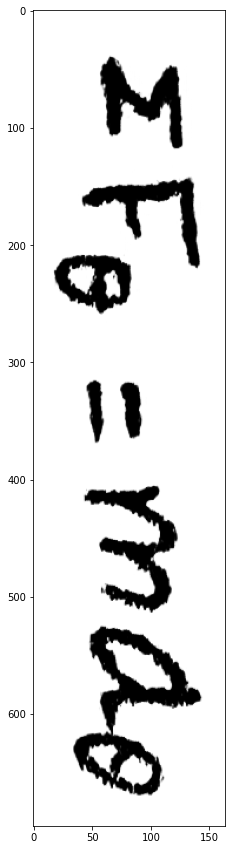

In [96]:
fig, axes = plt.subplots(1, 1, figsize=(8, 15))
axes.imshow(result, cmap='gray')

In [97]:
#gray = result.convert('L')

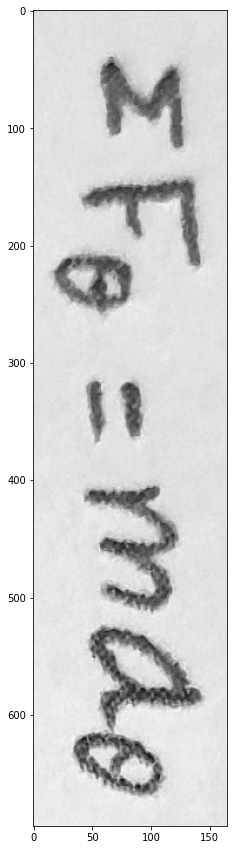

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(8, 15))
axes.imshow(img, cmap='gray')

In [94]:
gray = img.convert('L')

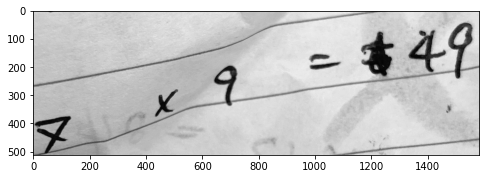

In [95]:
fig, axes = plt.subplots(1, 1, figsize=(8, 15))
axes.imshow(gray, cmap='gray')

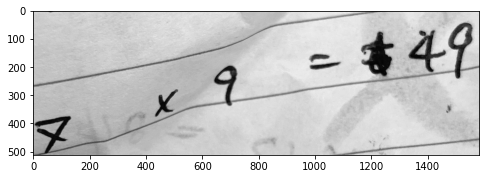

In [96]:
rgb = img.convert('RGB')
fig, axes = plt.subplots(1, 1, figsize=(8, 15))
axes.imshow(gray, cmap='gray')

In [ ]:

        if i >= opt.num_test:  # only apply our model to opt.num_test images.
            break
        model.set_input(data)  # unpack data from data loader
        with torch.no_grad():
            model.forward()
        img = model.fake
        model.test()           # run inference
        #visuals = model.get_current_visuals()  # get image results
        img_path = model.get_image_paths()     # get image paths
        #if i % 5 == 0:  # save images to an HTML file
            print('processing (%04d)-th image... %s' % (i, img_path))